Script to plot the permittivity of MoO3

## Open the packages for the script

In [121]:
import numpy as np
import matplotlib.pyplot as plt

## Define the function of the permittivity
Parameters from paper: https://onlinelibrary.wiley.com/doi/abs/10.1002/adma.201908176

In [77]:
def eps_harm_Osc(w, wT, wL, gamma):
    eps_h = (w*w-wL**2+1j*gamma*w)/(w*w-wT**2+1j*gamma*w)
    return eps_h

In [106]:
def eps_MoO3(w, axis):
    if(axis=='[100]'): # x-axis of MoO3
        epsinf = 6.09
        gamma = np.array([[73, 11.9, 2.1]])
        wTO = np.array([[507, 822.7, 998.8]])
        wLO = np.array([[534, 978.8, 999.5]])

    if(axis=='[001]'): # z-axis of MoO3
        epsinf = 6.38
        gamma = np.array([[17.9]])
        wTO = np.array([[544.9]])
        wLO = np.array([[855.8]])

    if(axis=='[010]'): # y-axis of MoO3
        epsinf = 4.4
        gamma = np.array([[0.7]])
        wTO = np.array([[963]])
        wLO = np.array([[1006.6]])

    eps = np.ones(np.shape(w)[0],)
    for i in range(np.shape(wTO)[1]):
        eps = eps*eps_harm_Osc(w,wTO[0,i],wLO[0,i],gamma[0,i])

    eps = epsinf*eps

    return eps

# Calculate the permittivity within the RB of MoO3

In [123]:
# Inputs:

n = 10**5 # num of discretized points
w = np.linspace(500,1100,n) # frequency in cm^-1

# Code lines:

epsx = eps_MoO3(w,'[100]')
epsy = eps_MoO3(w,'[001]')
epsz = eps_MoO3(w,'[010]')


# Plot the permittivities
Continuous line is real part, discontinuous imaginary part

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\e'
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_2440\1210118051.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega (cm^{-1})$")
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_2440\1210118051.py:5: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\epsilon_x$")
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_2440\1210118051.py:11: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\epsilon_y$")
C:\Users\Nathaniel\AppData\Local\Temp\ipykernel_2440\12101

<function matplotlib.pyplot.show(close=None, block=None)>

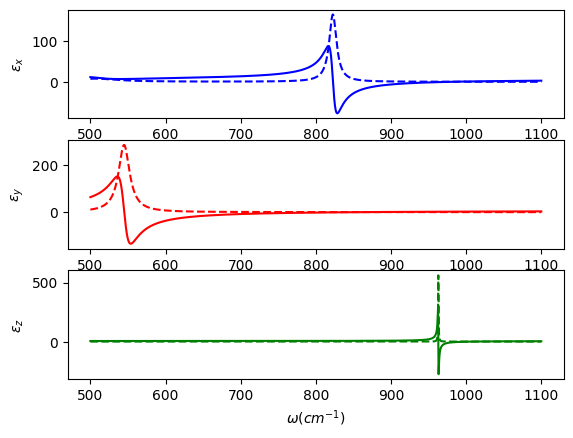

In [120]:
plt.subplot(3, 1, 1)
plt.plot(w,np.real(epsx),'b-')
plt.plot(w,np.imag(epsx),'b--')
plt.xlabel("$\omega (cm^{-1})$")
plt.ylabel("$\epsilon_x$")

plt.subplot(3, 1, 2)
plt.plot(w,np.real(epsy),'r-')
plt.plot(w,np.imag(epsy),'r--')
plt.xlabel("Frequency (cm^{-1})")
plt.ylabel("$\epsilon_y$")

plt.subplot(3, 1, 3)
plt.plot(w,np.real(epsz),'g-')
plt.plot(w,np.imag(epsz),'g--')
plt.xlabel("$\omega (cm^{-1})$")
plt.ylabel("$\epsilon_z$")
plt.show